In [5]:
import numpy as np
# 随机返回一个[2,5)的整数
angle = np.random.random() * np.pi * 2
v_pref = 1.0
circle_radius = 6
px_noise = (np.random.random() - 0.5) * v_pref
py_noise = (np.random.random() - 0.5) * v_pref
px = circle_radius * np.cos(angle) + px_noise
py = circle_radius * np.sin(angle) + py_noise
vx = v_pref * np.cos(angle) 
vy = v_pref * np.sin(angle) 
gx = -px
gy = -py

In [6]:
import rvo2
import os
import gym
import numpy as np
# 设置仿真环境
sim = rvo2.PyRVOSimulator(timeStep = 0.2, neighborDist = 1.5,
                          maxNeighbors = 5, timeHorizon = 1.5, 
                          timeHorizonObst = 2, radius = 0.4, maxSpeed = 2)
# 设置agent位置
n_agents = 1
rvo_agents = [None]*n_agents
for a in range(n_agents):
    rvo_agents[a] = sim.addAgent((0,0))
    sim.setAgentPrefVelocity(rvo_agents[a], (1,0))
# 设置agent的期望速度
print("agent num:{}".format(sim.getNumAgents()))
sim.doStep()
print("postion{}, vel{}".format(sim.getAgentPosition(rvo_agents[0]), sim.getAgentVelocity(rvo_agents[0])))


agent num:1
postion(0.20000000298023224, 0.0), vel(1.0, 0.0)


In [1]:
import os
import gym
import numpy as np
os.environ['GYM_CONFIG_PATH'] = "config_test.py"
os.environ['GYM_CONFIG_CLASS'] = 'Train'
gym.logger.set_level(40)

from gym_collision_avoidance.envs import Config
from gym_collision_avoidance.model import set_agents

env = gym.make("CollisionAvoidance-v0")
agents = set_agents.generate_random_human_position()
env.set_agents(agents)
obs = env.reset()

# 可视化位置

# print(obs[0])

# for key,value in obs.items():
#     print(f"key:{key}, value{value}")


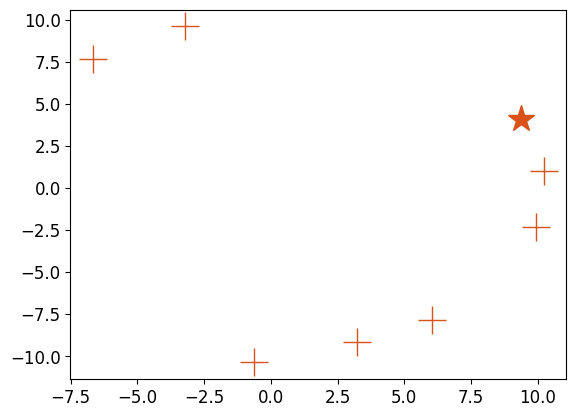

In [14]:


from gym_collision_avoidance.envs.util import find_nearest, rgba2rgb, makedirs
import matplotlib.pyplot as plt
# plt.xlim(-8,9)
# plt.ylim(-8,9)

agents = set_agents.generate_random_human_position(num_agents= 8, circle_radius= 10, min_dist= 3)

plt_colors = []
plt_colors.append([0.8500, 0.3250, 0.0980])  # orange
plt_colors.append([0.0, 0.4470, 0.7410])  # blue
plt_colors.append([0.4660, 0.6740, 0.1880])  # green
plt_colors.append([0.4940, 0.1840, 0.5560])  # purple
plt_colors.append([0.9290, 0.6940, 0.1250])  # yellow
plt_colors.append([0.3010, 0.7450, 0.9330])  # cyan
plt_colors.append([0.6350, 0.0780, 0.1840])  # chocolate

pos = agents[0].get_agent_data('pos_global_frame')
plt.plot(pos[0], pos[1], color=plt_colors[0], marker='*', markersize=20)
for a in agents[1:]:
    pos = a.get_agent_data('pos_global_frame')
    plt.plot(pos[0], pos[1], color=plt_colors[0], marker='+', markersize=20)

In [12]:
actions = {}
actions[0] = np.array(2)
obs, rewards, game_over, which_agents_done = env.step(actions)

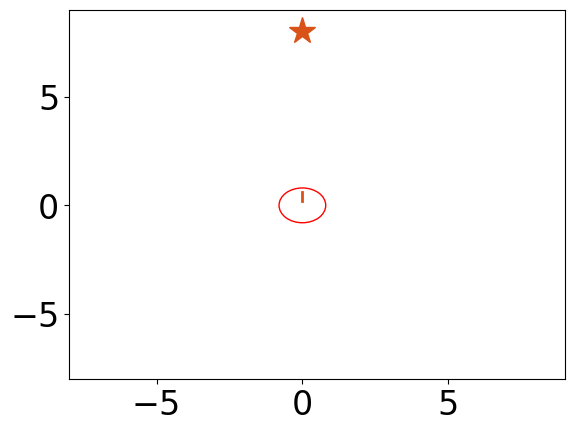

In [49]:

from gym_collision_avoidance.envs.util import find_nearest, rgba2rgb, makedirs
figure, ax = plt.subplots()
import matplotlib.pyplot as plt
plt.xlim(-8,9)
plt.ylim(-8,9)

plt_colors = []
plt_colors.append([0.8500, 0.3250, 0.0980])  # orange
plt_colors.append([0.0, 0.4470, 0.7410])  # blue
plt_colors.append([0.4660, 0.6740, 0.1880])  # green
plt_colors.append([0.4940, 0.1840, 0.5560])  # purple
plt_colors.append([0.9290, 0.6940, 0.1250])  # yellow
plt_colors.append([0.3010, 0.7450, 0.9330])  # cyan
plt_colors.append([0.6350, 0.0780, 0.1840])  # chocolate

a = agents[0]
b = agents[0].global_state_history[:agents[0].step_num, 2]

plt.plot(a, b, color=plt_colors[0],ls='-', linewidth=2)

plt.plot(agents[0].global_state_history[0, 3],               # 目标位置
                     agents[0].global_state_history[0, 4],
                     color=plt_colors[0], marker='*', markersize=20)



circle_spacing = 0.2
circle_times = np.arange(0.0, agents[0].global_state_history[agents[0].step_num-1, 0], circle_spacing)
_, circle_inds = find_nearest(agents[0].global_state_history[:agents[0].step_num, 0],circle_times)



ax.add_patch(plt.Circle((0,0), 0.8, color='r', fill=False))


In [35]:
np.linspace(0, 3, 1)

array([0.])

In [5]:

pre_goal_postion = agents[0].get_agent_data("heading_ego_frame")
print(pre_goal_postion)
agents[0].ego_pos_to_global_pos()

0.0
